In [3]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_ro_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [4]:
data

['t_n55          5.8659 ( 5.5342,  6.8271) ( 5.5172,  6.5710)  1.0538 (Jnode 106)\n',
 't_n56          5.0823 ( 4.0069,  6.1168) ( 4.0081,  6.1176)  2.1095 (Jnode 105)\n',
 't_n57          4.6952 ( 3.6629,  5.6681) ( 3.6439,  5.6413)  1.9973 (Jnode 104)\n',
 't_n58          3.8679 ( 2.9802,  4.7227) ( 2.9833,  4.7244)  1.7410 (Jnode 103)\n',
 't_n59          3.7251 ( 2.8669,  4.5545) ( 2.8503,  4.5323)  1.6821 (Jnode 102)\n',
 't_n60          3.5409 ( 2.7225,  4.3396) ( 2.7064,  4.3195)  1.6131 (Jnode 101)\n',
 't_n61          3.2749 ( 2.5086,  4.0288) ( 2.4996,  4.0137)  1.5141 (Jnode 100)\n',
 't_n62          1.4236 ( 0.8902,  2.0217) ( 0.8607,  1.9882)  1.1276 (Jnode 99)\n',
 't_n63          2.2492 ( 1.6509,  2.8664) ( 1.6586,  2.8718)  1.2133 (Jnode 98)\n',
 't_n64          1.5834 ( 1.1240,  2.0869) ( 1.0963,  2.0557)  0.9594 (Jnode 97)\n',
 't_n65          1.3824 ( 0.9727,  1.8416) ( 0.9560,  1.8226)  0.8666 (Jnode 96)\n',
 't_n66          1.0639 ( 0.7327,  1.4452) ( 0.7175,  1.42

In [5]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [6]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [7]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [8]:
posterior_mean_iqtree

[5.8659,
 5.0823,
 4.6952,
 3.8679,
 3.7251,
 3.5409,
 3.2749,
 1.4236,
 2.2492,
 1.5834,
 1.3824,
 1.0639,
 0.713,
 0.4739,
 0.2018,
 1.67,
 3.6218,
 3.4571,
 3.2672,
 2.2673,
 2.026,
 1.7634,
 3.5095,
 3.3294,
 3.2145,
 2.9968,
 2.7435,
 2.6629,
 2.3092,
 2.0936,
 1.9167,
 1.4263,
 1.3043,
 2.3226,
 1.8547,
 3.442,
 0.7132,
 3.3544,
 3.1235,
 2.7663,
 2.55,
 1.8525,
 2.1249,
 2.6487,
 2.5478,
 2.347,
 1.7141,
 2.2778,
 4.1552,
 2.9464,
 1.7528,
 1.3679,
 4.4205]

In [9]:
lower_ci_iqtree

[]

In [10]:
upper_ci_iqtree

[]

In [11]:
file_LG = open("LG_ro_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [13]:
posterior_mean_baseml

[5.9172,
 5.4019,
 4.6947,
 3.8165,
 3.5899,
 3.325,
 2.9569,
 1.4217,
 2.0881,
 1.4757,
 1.2412,
 0.9299,
 0.6148,
 0.4064,
 0.1729,
 1.5442,
 3.3662,
 2.7291,
 2.9592,
 2.0925,
 1.7722,
 1.7063,
 3.3786,
 3.1128,
 2.9332,
 2.7117,
 2.4397,
 2.3024,
 1.9466,
 1.7147,
 1.5039,
 1.119,
 0.9497,
 2.0298,
 1.5784,
 3.2441,
 0.8506,
 3.0986,
 2.8129,
 2.4121,
 2.1489,
 1.5437,
 1.6643,
 2.3331,
 2.1213,
 1.7913,
 1.5419,
 2.0126,
 4.0587,
 2.9336,
 1.7673,
 1.6036,
 4.5039]

In [14]:
posterior_mean_iqtree

[5.8659,
 5.0823,
 4.6952,
 3.8679,
 3.7251,
 3.5409,
 3.2749,
 1.4236,
 2.2492,
 1.5834,
 1.3824,
 1.0639,
 0.713,
 0.4739,
 0.2018,
 1.67,
 3.6218,
 3.4571,
 3.2672,
 2.2673,
 2.026,
 1.7634,
 3.5095,
 3.3294,
 3.2145,
 2.9968,
 2.7435,
 2.6629,
 2.3092,
 2.0936,
 1.9167,
 1.4263,
 1.3043,
 2.3226,
 1.8547,
 3.442,
 0.7132,
 3.3544,
 3.1235,
 2.7663,
 2.55,
 1.8525,
 2.1249,
 2.6487,
 2.5478,
 2.347,
 1.7141,
 2.2778,
 4.1552,
 2.9464,
 1.7528,
 1.3679,
 4.4205]

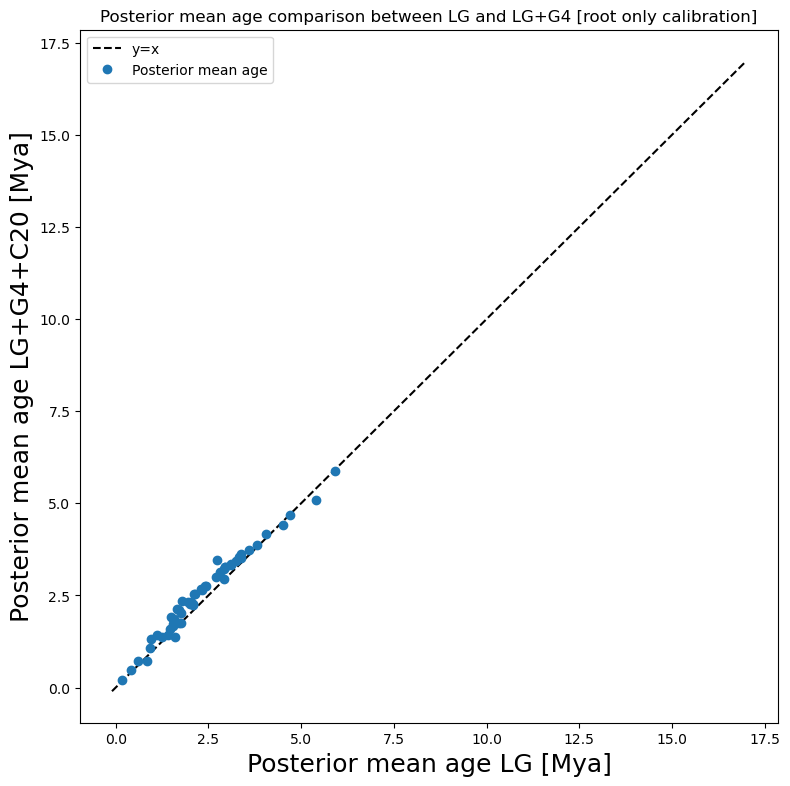

In [15]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('metazoa_posterior_mean_age_comparison_LG_G4_C20_ro_scatter.png')

In [16]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')